###Monte Carlo – 21 Blackjack

####1. Estimate the probability of getting a 21, the average number of cards required to complete 21 and plot the experimental distribution of the number of card required to complete 21 drawing cards sequentially from a shuffled deck

In [10]:
import random
import matplotlib.pyplot as plt

In [11]:
def filldeck(n):
  deck = []
  for x in range(4):
    for i in range(n):
      deck.append(i+1)
  return deck

In [12]:
def deckgen(n,t):
  deck = []
  if t == 0:
    for i in range(n):
      deck.append(0)
  else:
    for i in range(n):
      deck.append(i+1)
  return deck

In [13]:
def montecarlo_simulation(n,deck_size):
  win= 0
  card_values = deckgen(deck_size,1)
  card_numbers = deckgen(deck_size,0)
  card_average = 0
  for i in range(n):
    card_number = 0
    deck = filldeck(deck_size)
    picked_cards = []
    while(sum(picked_cards)<21):
      card_number +=1
      card = random.choice(deck)
      picked_cards.append(card)
      deck.remove(card)
    if(sum(picked_cards)==21):
      win+=1
      card_numbers[card_number-1] += 1
      card_average += card_number
  print('Probability of getting a 21: ', win/n)
  print('Card numbers ',card_numbers)
  print('Average number of cards: ', card_average/win)
  plt.bar(card_values,card_numbers);

#####With a Spanish 48-card deck:

Probability of getting a 21:  0.1578584
Card numbers  [0, 284025, 627434, 449231, 170879, 40260, 6123, 592, 38, 2, 0, 0]
Average number of cards:  3.4152062861399837


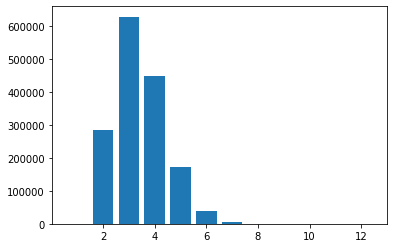

In [14]:
montecarlo_simulation(10000000,12)

#####With an American 52-card deck:

Probability of getting a 21:  0.144731
Card numbers  [0, 361216, 589363, 351498, 116746, 24833, 3359, 277, 18, 0, 0, 0, 0]
Average number of cards:  3.216402843896608


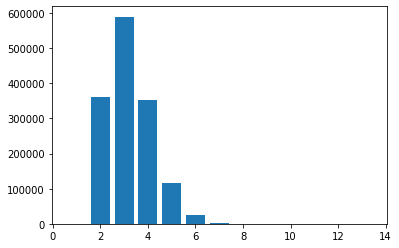

In [15]:
montecarlo_simulation(10000000,13)

####2. Estimate the probability of getting a 21, the average total number of cards required to complete 21 and plot the experimental distribution of the number of cards required to complete 21; assuming that you have in your hand the cards [7,7,5] and the remaining deck has n/2 cards for the regular Spanish 48-card deck and the Poker 52-card decks. You can pick the n/2 cards in the remaining deck in whatever way you choose but with restriction that this has maximum two 7s and three 5, you have to keep the remaining deck fixed through the Montecarlo simulations, use 10 million simulations.

In [16]:
def fixdeck(deck):
  n= len(deck)/2
  for i in range(2):
    deck.remove(7)
  deck.remove(5)
  while len(deck) > n:
    deck.remove(random.choice(deck))
  return deck

In [17]:
def fixed_montecarlo_simulation(n,deck_size):
  win= 0
  card_values = deckgen(deck_size,1)
  card_numbers = deckgen(deck_size,0)
  card_average = 0
  for i in range(n):
    card_number = 0
    deck = filldeck(deck_size)
    deck = fixdeck(deck)
    picked_cards = [7,7,5]
    while(sum(picked_cards)<21):
      card_number +=1
      card = random.choice(deck)
      picked_cards.append(card)
      deck.remove(card)
    if(sum(picked_cards)==21):
      win+=1
      card_numbers[card_number-1] += 1
      card_average += card_number
  print('Probability of getting a 21: ', win/n)
  print('Card numbers ',card_numbers)
  print('Average number of cards: ', card_average/win)
  plt.bar(card_values,card_numbers);

#####With a Spanish 48-card deck:

Probability of getting a 21:  0.0949536
Card numbers  [888873, 60663, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Average number of cards:  1.0638869932261652


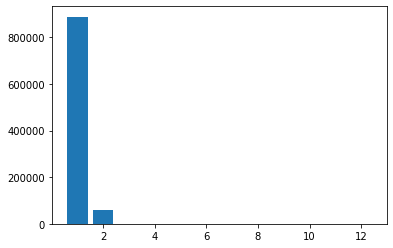

In [18]:
fixed_montecarlo_simulation(10000000,12)

#####With an American 52-card deck:

Probability of getting a 21:  0.086756
Card numbers  [816246, 51314, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Average number of cards:  1.059147494121444


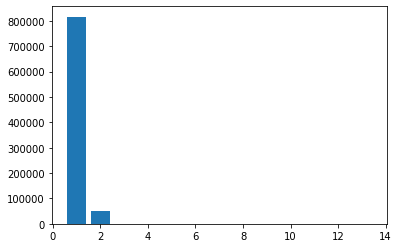

In [19]:
fixed_montecarlo_simulation(10000000,13)

####3. Estimate and calculate analytically the probability of getting a 21, the average total number of cards required to complete 21 and the experimental distribution of the number of card required to complete 21; assuming that you have in your hand the cards [7,7,5] and the remaining deck has two possible sets of 8 cards for the regular Spanish 48-card deck and the Poker 52-card decks. The two possible remaining decks are a (hot deck) that contains four 1 cards and four 2 cards a (cold deck) with not 1 or 2 cards, for the estimations use Montecarlo with 10 million simulations.

In [20]:
def cold_deck_gen(deck_size):
  deck = []
  for i in range(8):
    deck.append(random.randint(3, deck_size))
  return deck

In [21]:
def fixed_montecarlo_simulation2(n,deck_size):
  win= 0
  card_values = deckgen(deck_size,1)
  card_numbers = deckgen(deck_size,0)
  card_average = 0
  for i in range(n):
    hot_deck= [1,1,1,1,2,2,2,2]
    cold_deck= cold_deck_gen(deck_size)
    card_number = 0
    random_deck = random.randint(1, 2)
    if random_deck == 1:
      deck = hot_deck
    else:
      deck = cold_deck
    picked_cards = [7,7,5]
    while(sum(picked_cards)<21):
      card_number +=1
      card = random.choice(deck)
      picked_cards.append(card)
      deck.remove(card)
    if(sum(picked_cards)==21):
      win+=1
      card_numbers[card_number-1] += 1
      card_average += card_number
  print('Probability of getting a 21: ', win/n)
  print('Card numbers ',card_numbers)
  print('Average number of cards: ', card_average/win)
  plt.bar(card_values,card_numbers);


#####With a Spanish 48-card deck

Probability of getting a 21:  0.3569904
Card numbers  [2499483, 1070421, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Average number of cards:  1.2998458782084896


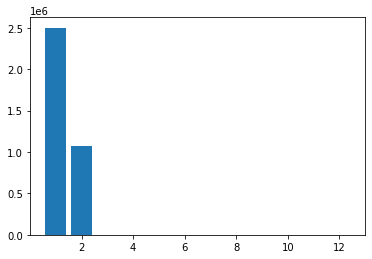

In [22]:
fixed_montecarlo_simulation2(10000000,12)

#####With an American 52-card deck


Probability of getting a 21:  0.356982
Card numbers  [2497457, 1072363, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Average number of cards:  1.300396938781227


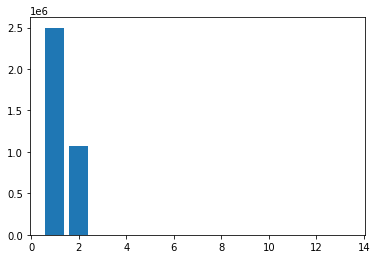

In [23]:
fixed_montecarlo_simulation2(10000000,13)

####4. Estimate the average amount of money (expected value) that Ben wins or losses on a weekend if Ben goes to Vegas every weekend (Friday, Saturday and Sunday), plays every weekend day 10 hours, each game takes 3 mins.

####Assume that for each game he gets two possibilities: 
#####In one he gets in his hand the cards [7,7,5] and a remaining hot deck with 8 cards in which case he bets 1000USD this happens with probability 1/10

#####In the other one he gets no cards in his hand a complete shuffled deck in which case he bets $10, this happens with the remaining probability 9/10. Use 10000 Montecarlo simulations to estimated the expected amount of money that Ben wins or losses on a weekend for the Spanish 48-card deck and for a Poker 52-card deck.

In [24]:
#   If ben plays 10 hours straight and each game takes 3 minutes
#   it means 600min/3min = 200 games per day, with a total of
#   600 games per weekend
def ben_montecarlo(n,deck_size):
  money = 0
  for i in range(n):
    for j in range(600):
      random_choice = random.randint(1,10)
      if random_choice == 1:
        deck = [1,1,1,1,2,2,2,2]
        picked_cards = [7,7,5]
        while(sum(picked_cards)<21):
          card = random.choice(deck)
          picked_cards.append(card)
          deck.remove(card)
        if sum(picked_cards) == 21:
          money += 1500
        else:
          money -= 1000
      else:
        deck = filldeck(deck_size)
        picked_cards = []
        while(sum(picked_cards)<21):
          card = random.choice(deck)
          picked_cards.append(card)
          deck.remove(card)
        if sum(picked_cards) == 21:
          money += 15
        else:
          money -= 10
  print('Money: ',money)

#####With a Spanish 48-card deck

In [25]:
ben_montecarlo(10000,12)

Money:  436910335


#####With an American 52-card deck


In [26]:
ben_montecarlo(10000,13)

Money:  437137090
